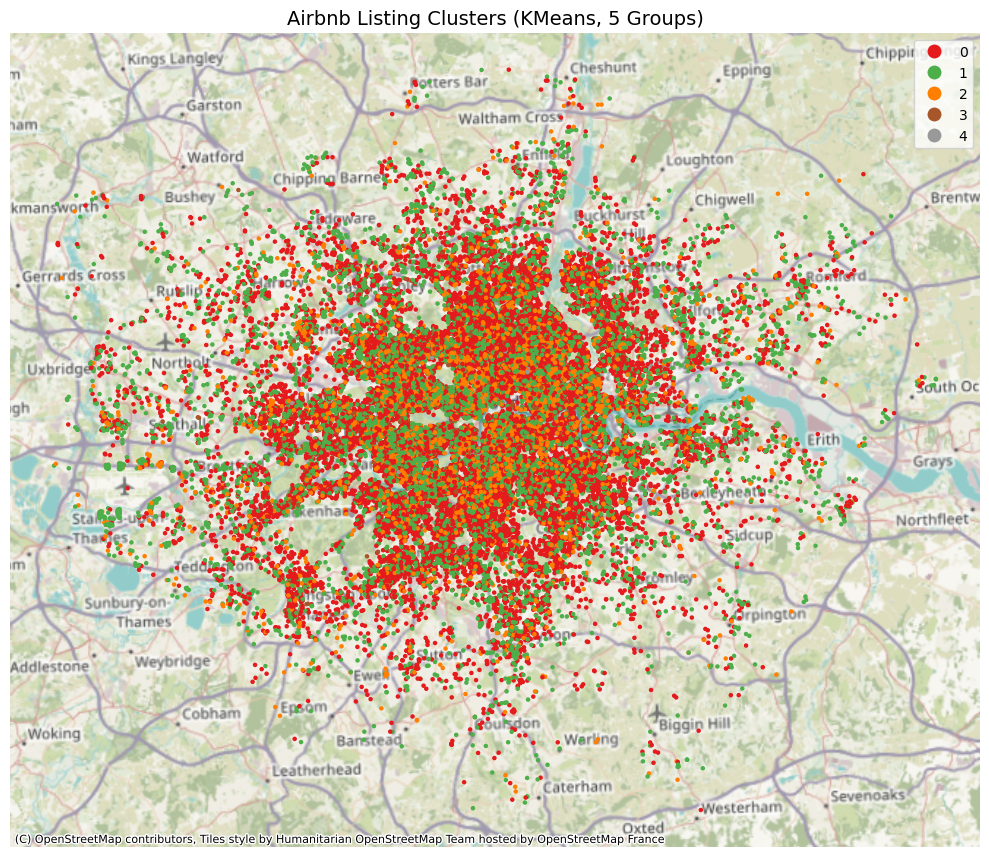

,price,reviews_per_month,availability_365,calculated_host_listings_count
cluster,,,,
0,115.02,0.47,21.98,3.90
1,191.36,0.85,281.96,8.90
2,129.85,4.03,153.07,6.41
3,550.02,0.49,101.44,183.90
4,5024.90,0.59,182.43,75.09


In [1]:
# Re-import necessary libraries due to kernel reset
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import contextily as ctx

# Reload data
df = pd.read_csv("UK_airbnb.csv")
df = df[df['price'] > 0]
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326').to_crs(epsg=27700)

# Select variables for clustering and drop missing values
cluster_vars = ['price', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']
gdf_cluster = gdf[cluster_vars + ['geometry']].dropna().copy()

# Standardize variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gdf_cluster[cluster_vars])

# KMeans clustering (5 groups)
kmeans = KMeans(n_clusters=5, random_state=66, n_init='auto')
gdf_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clustered results
fig, ax = plt.subplots(figsize=(10, 10))
gdf_cluster.plot(column='cluster', categorical=True, legend=True, cmap='Set1', markersize=5, ax=ax)
ctx.add_basemap(ax, crs=gdf_cluster.crs.to_string())
ax.set_title("Airbnb Listing Clusters (KMeans, 5 Groups)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# Output mean values of cluster variables by cluster
gdf_cluster.groupby('cluster')[cluster_vars].mean().round(2)


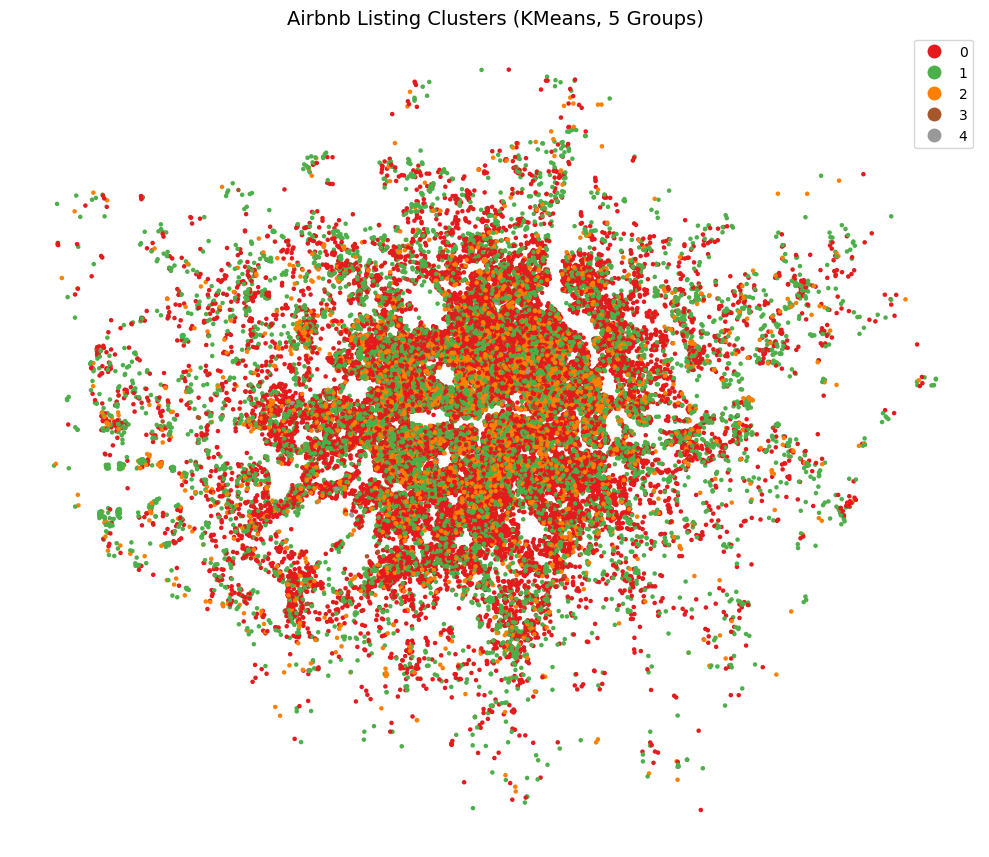

,price,reviews_per_month,availability_365,calculated_host_listings_count
cluster,,,,
0,115.02,0.47,21.98,3.90
1,191.36,0.85,281.96,8.90
2,129.85,4.03,153.07,6.41
3,550.02,0.49,101.44,183.90
4,5024.90,0.59,182.43,75.09


In [2]:
# Plot clustering results without basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf_cluster.plot(column='cluster', categorical=True, legend=True, cmap='Set1', markersize=5, ax=ax)
ax.set_title("Airbnb Listing Clusters (KMeans, 5 Groups)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

# Output summary statistics for each cluster
gdf_cluster.groupby('cluster')[cluster_vars].mean().round(2)


In [3]:
gdf_cluster['cluster'].value_counts(normalize=True)

cluster
0    0.611110
1    0.273585
2    0.086598
3    0.027071
4    0.001636
Name: proportion, dtype: float64